### Watermark Embedding and Detection in Images Using DCT

This file demonstrates the process of embedding and detecting watermarks in images using Discrete Cosine Transform (DCT). The workflow includes functions for embedding a watermark, adding noise to the watermarked image, and detecting the watermark from both the noisy and original watermarked images.

#### **Libraries use in code**

1. **`numpy`** (`np`):
   - **Role**: Used for handling numerical data and arrays. It is the core of image manipulation since images are essentially arrays of pixel values.
   
2. **`cv2` (OpenCV)**:
   - **Role**: Used for reading, writing, and manipulating images, applying transformations, and working with color channels.
   
3. **`matplotlib.pyplot`** (`plt`):
   - **Role**: Used for visualizing images and plots, often used in a Jupyter notebook or interactive Python environment.


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Display function to compare images by eyes

In [33]:
def display_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.title(image_path)
    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.show()
    
def display_images(image_path1, image_path2):
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    print(image_path1 + ' and ' + image_path2)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
    axes[0].imshow(image1_rgb)
    axes[0].axis('off') 
    axes[1].imshow(image2_rgb)
    axes[1].axis('off')  
    plt.show()

#### Normalized Cross-Correlation Function:
- It is a statistical method used to measure the similarity between two signals or images

In [3]:
def NCC(img1, img2):
    return abs(np.mean(np.multiply((img1 - np.mean(img1)), (img2 - np.mean(img2)))) / 
               (np.std(img1) * np.std(img2)))

#### Embedding Function:
##### **1. Read the Images and Get Dimensions**
- The first step in the `embeded` function is to read both the cover image and the watermark. The cover image is read in color, while the watermark is read in grayscale.
  
  - **`cv2.imread(cover_data, cv2.IMREAD_COLOR)`**: Loads the cover image in color.
  - **`cv2.imread(watermark, cv2.IMREAD_GRAYSCALE)`**: Loads the watermark in grayscale.
  
  The function also extracts the height and width of both the watermark and the cover image for later use.

---

##### **2. Calculate the Watermark's Position**
- The position of where the watermark will be placed in the cover image is calculated using the `secret_key`.
  - **`start_x` and `start_y`**: These are calculated to determine where to place the watermark in the cover image based on the dimensions of both.
  - **Ensuring Bounds**: The position is adjusted to ensure that the watermark doesn’t extend beyond the edges of the cover image. This is done using `min` and `max` functions.

---
##### **3. Split the Cover Image into Channels**
- The cover image is split into its three color channels (Blue, Green, Red). Each channel will be processed independently.
  
  - **`cv2.split(cover_data)`**: This splits the image into its individual color components (BGR).

---

##### **4. Apply DCT (Discrete Cosine Transform)**
- The DCT is applied to each of the three color channels (Blue, Green, and Red).
  - **`cv2.dct(np.float32(cover_b))`**: Converts the Blue channel into the frequency domain, making it easier to embed the watermark in the frequency coefficients.
  - The same process is applied to the Green and Red channels.

---

##### **5. Embed the Watermark**
- The watermark is embedded by adding its values (scaled by the `alpha` parameter) to the DCT coefficients of the image. 
  - This is done for each pixel of the watermark in all three color channels.
  - **`alpha * watermark[j, i]`**: This scales the watermark’s pixel value, where `alpha` controls how noticeable the watermark is.

---

##### **6. Apply Inverse DCT (IDCT)**
- After the watermark has been embedded in the frequency domain, the Inverse DCT is applied to each channel (Blue, Green, Red) to bring the image back to the spatial domain.
  
  - **`cv2.idct(dct_b)`**: Converts the Blue channel back to the spatial domain (image space).
  - The same process is applied to the Green and Red channels.

---

##### **7. Reconstruct the Image**
- After IDCT, the values of the channels are clipped to make sure they are within the valid range (0-255), preventing any invalid pixel values.
  
  - **`np.clip(watermarked_b, 0, 255)`**: Clamps the pixel values to the valid range.
  
- Finally, the three channels are merged back into a single image.

  - **`cv2.merge([watermarked_b, watermarked_g, watermarked_r])`**: Merges the processed Blue, Green, and Red channels back together into a full image.

---

##### **8. Save the Watermarked Image**
- The final watermarked image is saved to the disk as a file called `watermarked_color.jpg`.

  - **`cv2.imwrite(output_path, np.uint8(watermarked_image))`**: Saves the final image after watermarking.

---
#### **Key Parameters**:
- **`cover_data`**: Path to the image which is prepare for embeded.
- **`watermark`**: Path to the watermark for embeded image.
- **`secret_key`**: Determines the watermark's position and security.

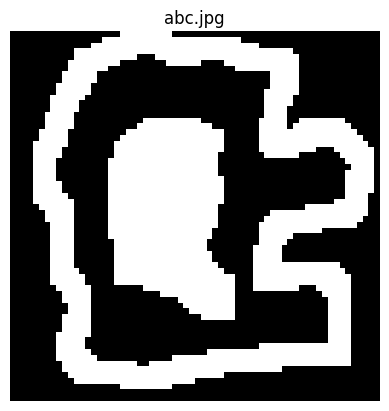

original2.jpg and watermarked_color.jpg


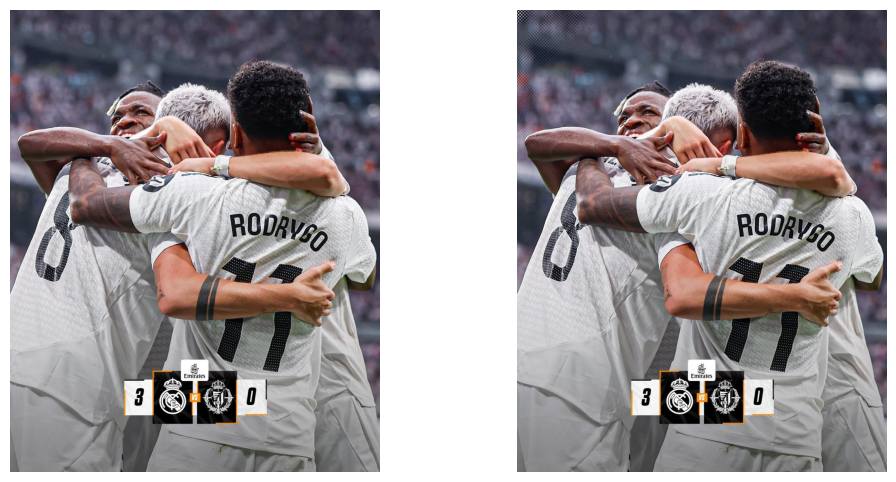

NCC between original and embeded image: 0.9998425459966543


In [59]:
alpha = 0.1
def embeded(watermark, cover_data, secret_key):
    # Read the images
    global w_height, w_width
    cover_data = cv2.imread(cover_data, cv2.IMREAD_COLOR)
    watermark = cv2.imread(watermark, cv2.IMREAD_GRAYSCALE)
    w_height, w_width = watermark.shape
    height, width, _ = cover_data.shape
    
    # Position of the watermark and ensure watermark in the image
    start_x = int((width - w_width) * secret_key) 
    start_y = int((height - w_height) * secret_key)
    start_x = min(start_x, width - w_width)  
    start_y = min(start_y, height - w_height)  
    start_x = max(start_x, 0)
    start_y = max(start_y, 0)
    
    # Split the cover image into its color channels
    cover_b, cover_g, cover_r = cv2.split(cover_data)
    dct_b = cv2.dct(np.float32(cover_b))  # Blue channel
    dct_g = cv2.dct(np.float32(cover_g))  # Green channel
    dct_r = cv2.dct(np.float32(cover_r))  # Red channel

    # Embed the watermark use Direct Cosine Transform
    for i in range(w_height):
        for j in range(w_width):
            dct_b[start_y + j, start_x + i] += alpha * watermark[j, i]
            dct_g[start_y + j, start_x + i] += alpha * watermark[j, i]
            dct_r[start_y + j, start_x + i] += alpha * watermark[j, i]

    # Reconstruct the image use Inverse Direct Cosine Transform
    watermarked_b = cv2.idct(dct_b)
    watermarked_g = cv2.idct(dct_g)
    watermarked_r = cv2.idct(dct_r)

    # Recolor the image, np.clip: Clip (limit) the values in an array
    watermarked_b = np.clip(watermarked_b, 0, 255)
    watermarked_g = np.clip(watermarked_g, 0, 255)
    watermarked_r = np.clip(watermarked_r, 0, 255)
    watermarked_image = cv2.merge([watermarked_b, watermarked_g, watermarked_r])

    # Saving
    output_path = "watermarked_color.jpg"
    cv2.imwrite(output_path, np.uint8(watermarked_image))
    
    return watermarked_image

display_image("abc.jpg")
display_images("original2.jpg", "watermarked_color.jpg")
secret_key = 0.2
output = embeded("abc.jpg", "original2.jpg", secret_key)
print("NCC between original and embeded image:", NCC(cv2.imread('original2.jpg', cv2.IMREAD_GRAYSCALE), cv2.imread('watermarked_color.jpg', cv2.IMREAD_GRAYSCALE)))

#### **Attacking Function (Noise)**:

1. **Generate Random Noise**:
   - The function first generates random noise using `np.random.randint(0, noise_level, image.shape, dtype='uint8')`. This creates an array of random integers with values between `0` and `noise_level`, having the same shape as the input image. The noise is generated with `uint8` (unsigned 8-bit integer) type to match typical image data types (0 to 255 for pixel values).

2. **Add Noise to the Image**:
   - The random noise is added to the original image using `np.add(image, noise)`. This operation adds the pixel values of the noise array to the corresponding pixels in the image.

3. **Clip the Values**:
   - The result is then clipped to ensure all pixel values are within the valid range of `[0, 255]` using `np.clip(noisy_image, 0, 255)`. This prevents any pixel values from going outside the valid range for an image (since pixel values in an image must be between 0 and 255).

4. **Return the Noisy Image**:
   - Finally, the function returns the noisy image with the added random noise.


original2.jpg and noisy_image.jpg


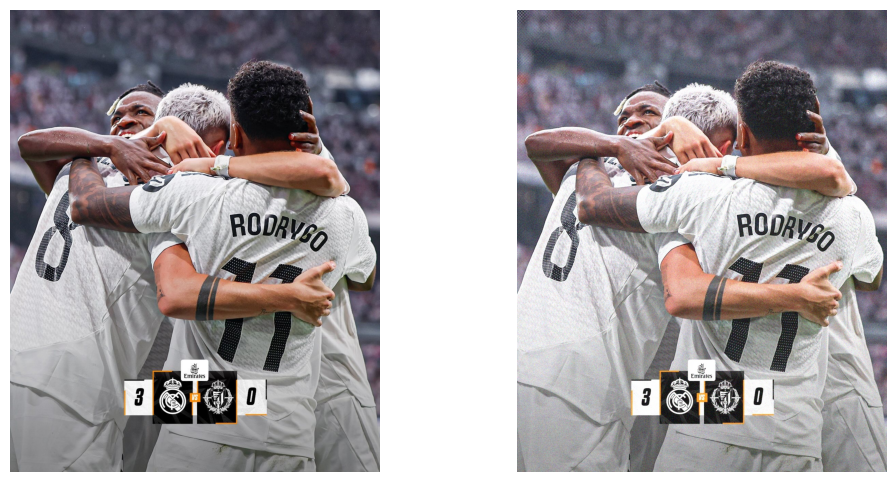

NCC between original and attacked image: 0.9871130766247981


In [47]:
def add_noise(image, noise_level):
    # Generate random noise of the same shape as the image
    noise = np.random.randint(0, noise_level, image.shape, dtype='uint8')
    
    # Add the noise to the image
    noisy_image = np.add(image, noise)
    noisy_image = np.clip(noisy_image, 0, 255)  
    
    return noisy_image

noisy_image = add_noise(output, noise_level=49)
cv2.imwrite('noisy_image.jpg', noisy_image)
display_images("original2.jpg", "noisy_image.jpg")
print("NCC between original and attacked image:", NCC(cv2.imread('original2.jpg', cv2.IMREAD_GRAYSCALE), cv2.imread('noisy_image.jpg', cv2.IMREAD_GRAYSCALE)))

#### **Detecting Function**:

1. **Load the Images**:
   - Load the original (cover) image and the watermarked image using OpenCV.

2. **Get Image Dimensions**:
   - Get the height and width of the original image and calculate the watermark's position using the `secret_key`.

3. **Split into Color Channels**:
   - Split both images into Blue, Green, and Red color channels.

4. **Apply DCT (Discrete Cosine Transform)**:
   - Apply DCT to each color channel of both images to convert them into the frequency domain.

5. **Extract Watermark**:
   - Initialize arrays to store the extracted watermark for each color channel.
   - For each pixel in the watermark region, calculate the difference in DCT coefficients between the watermarked and original images, and divide by `alpha` to recover the watermark.

6. **Rebuild the Watermark**:
   - Average the color channels to get a grayscale watermark.
   - Clip pixel values to ensure they are within the range [0, 255] and convert to 8-bit format.

7. **Save the Extracted Watermark**:
   - Save the extracted watermark as an image.

8. **Return the Watermark**:
   - Return the extracted watermark as a NumPy array.

#### **Key Parameters**:
- **`original_data`**: Path to the original image.
- **`test_data`**: Path to the watermarked image.
- **`secret_key`**: Determines the watermark's position and security.

abc.jpg and extracted_watermark.jpg


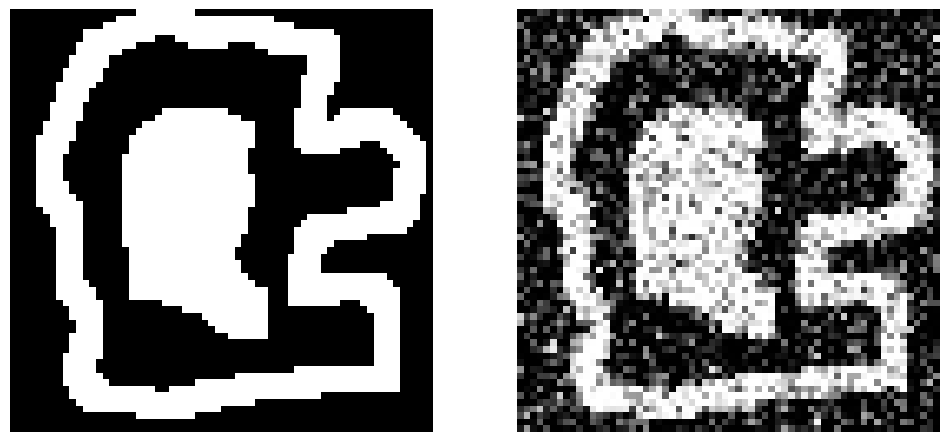

NCC between original_watermark and detected_attacked_watermark image: 0.8620030744777083


In [66]:
def detect(original_data, test_data, secret_key):
    # Load the images and information
    original_data = cv2.imread(original_data, cv2.IMREAD_COLOR)
    test_data = cv2.imread(test_data, cv2.IMREAD_COLOR)
    height, width, _ = original_data.shape
    
    # Known width and height of the watermark from global variables at embeded function
    start_x = int((width - w_width) * secret_key)
    start_y = int((height - w_height) * secret_key)
    start_x = min(start_x, width - w_width)  
    start_y = min(start_y, height - w_height)
    start_x = max(start_x, 0)
    start_y = max(start_y, 0)

    # Split the original and test image into their color channels
    original_b, original_g, original_r = cv2.split(original_data)
    test_b, test_g, test_r = cv2.split(test_data)

    # DCT
    dct_original_b = cv2.dct(np.float32(original_b))  # Blue channel
    dct_original_g = cv2.dct(np.float32(original_g))  # Green channel
    dct_original_r = cv2.dct(np.float32(original_r))  # Red channel
    dct_test_b = cv2.dct(np.float32(test_b))  # Blue channel
    dct_test_g = cv2.dct(np.float32(test_g))  # Green channel
    dct_test_r = cv2.dct(np.float32(test_r))  # Red channel

    # Detect the watermark
    extracted_watermark_b = np.zeros((w_height, w_width))
    extracted_watermark_g = np.zeros((w_height, w_width))
    extracted_watermark_r = np.zeros((w_height, w_width))
    for i in range(w_height):
        for j in range(w_width):
            extracted_watermark_b[j, i] = (dct_test_b[start_y + j, start_x + i] - dct_original_b[start_y + j, start_x + i]) / alpha
            extracted_watermark_g[j, i] = (dct_test_g[start_y + j, start_x + i] - dct_original_g[start_y + j, start_x + i]) / alpha
            extracted_watermark_r[j, i] = (dct_test_r[start_y + j, start_x + i] - dct_original_r[start_y + j, start_x + i]) / alpha

    # Rebuild the watermark, ensure the values are in right format
    extracted_watermark = np.mean([extracted_watermark_b, extracted_watermark_g, extracted_watermark_r], axis=0)
    extracted_watermark = np.clip(extracted_watermark, 0, 255)
    extracted_watermark = np.uint8(extracted_watermark)

    # Save 
    output_path = "extracted_watermark.jpg"
    cv2.imwrite(output_path, extracted_watermark)

    return extracted_watermark

watermark = detect("original2.jpg", "noisy_image.jpg", secret_key)
display_images("abc.jpg", "extracted_watermark.jpg")
print("NCC between original_watermark and detected_attacked_watermark image:", NCC(cv2.imread('abc.jpg', cv2.IMREAD_GRAYSCALE), cv2.imread('extracted_watermark.jpg', cv2.IMREAD_GRAYSCALE)))

abc.jpg and extracted_watermark.jpg


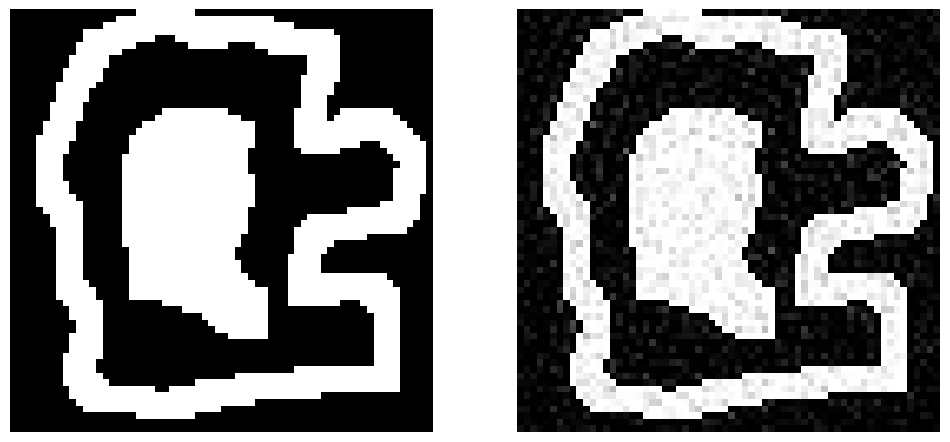

NCC between original_watermark and detected_watermark image: 0.9933006585563179


In [64]:
watermark = detect("original2.jpg", "watermarked_color.jpg", secret_key)
display_images("abc.jpg", "extracted_watermark.jpg")
print("NCC between original_watermark and detected_watermark image:", NCC(cv2.imread('abc.jpg', cv2.IMREAD_GRAYSCALE), cv2.imread('extracted_watermark.jpg', cv2.IMREAD_GRAYSCALE)))